<a href="https://colab.research.google.com/github/syilmazs/DeepLearning/blob/main/CNN_Project_catdogclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

In [1]:
# import libraries

In [2]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [ ]:
# read data and check how many class in train set

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/cnn_project_data.zip

In [5]:
my_data_dir = '/content/data'

In [6]:
os.listdir(my_data_dir) 

['validation', 'train', 'test']

In [7]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'
val_path = my_data_dir+'/validation/'

In [8]:
os.listdir(train_path)

['cat', 'dog']

In [9]:
len(os.listdir(test_path))

6897

**Let's check how many images there are.**

In [10]:
#number of cat images in train set
len(os.listdir(train_path+'cat'))

12500

In [11]:
#number of dog images in train set
len(os.listdir(train_path+'dog'))

5026

In [ ]:
#take cat image at index 0 from train set
#take dog image at index 1 from train set
#compare their shapes


In [12]:
os.listdir(train_path+'cat')[0]

'cat.1104.jpg'

In [13]:
os.listdir(train_path+'dog')[1]

'dog.11992.jpg'

In [14]:
cat0 = train_path+'cat'+'/cat.4602.jpg'
cat0

'/content/data/train/cat/cat.4602.jpg'

In [15]:
imread(cat0)

array([[[45, 53, 32],
        [45, 53, 32],
        [44, 52, 31],
        ...,
        [69, 64, 42],
        [67, 62, 40],
        [64, 58, 36]],

       [[45, 53, 32],
        [45, 53, 32],
        [45, 53, 32],
        ...,
        [72, 67, 45],
        [67, 62, 40],
        [64, 58, 36]],

       [[46, 54, 33],
        [45, 53, 32],
        [45, 53, 32],
        ...,
        [68, 63, 41],
        [59, 54, 32],
        [56, 50, 28]],

       ...,

       [[ 0,  0,  0],
        [21, 21, 19],
        [32, 32, 30],
        ...,
        [82, 66, 69],
        [82, 66, 69],
        [81, 65, 68]],

       [[ 0,  0,  0],
        [20, 20, 18],
        [31, 31, 29],
        ...,
        [83, 67, 70],
        [84, 68, 71],
        [86, 70, 73]],

       [[ 0,  0,  0],
        [19, 19, 17],
        [30, 30, 28],
        ...,
        [82, 66, 69],
        [86, 70, 73],
        [90, 74, 77]]], dtype=uint8)

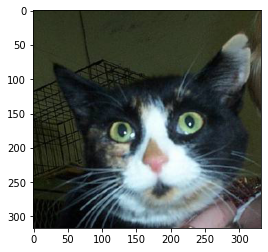

In [21]:
#show cat image
cat0_img= imread(cat0)
plt.imshow(cat0_img)

In [22]:
cat0_img.shape

(317, 332, 3)

In [23]:
dog1 = train_path+'dog'+'/dog.2199.jpg'
imread(dog1)

array([[[206, 184, 160],
        [206, 184, 160],
        [207, 185, 161],
        ...,
        [156, 197, 219],
        [156, 197, 219],
        [156, 197, 219]],

       [[206, 184, 160],
        [206, 184, 160],
        [207, 185, 161],
        ...,
        [156, 197, 219],
        [156, 197, 219],
        [156, 197, 219]],

       [[206, 184, 160],
        [206, 184, 160],
        [207, 185, 161],
        ...,
        [156, 197, 219],
        [156, 197, 219],
        [156, 197, 219]],

       ...,

       [[179, 146, 127],
        [179, 146, 127],
        [178, 145, 126],
        ...,
        [181, 148, 129],
        [180, 147, 128],
        [179, 146, 127]],

       [[179, 146, 127],
        [178, 145, 126],
        [177, 144, 125],
        ...,
        [180, 147, 128],
        [180, 147, 128],
        [179, 146, 127]],

       [[178, 145, 126],
        [178, 145, 126],
        [177, 144, 125],
        ...,
        [180, 147, 128],
        [180, 147, 128],
        [179, 146, 127]]

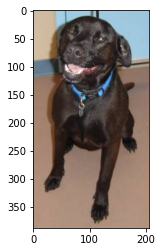

In [24]:
#show dog image
dog1_img= imread(dog1)
plt.imshow(dog1_img)


**Let's decide on the final dimension of these images.**

In [25]:
cat0_img.shape

(317, 332, 3)

In [26]:
dog1_img.shape

(388, 206, 3)

In [27]:
x = []
y = []
for image in os.listdir(train_path+'cat'):
    
    img = imread(train_path+'cat/'+image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)

In [28]:
x[:20]

[499,
 296,
 204,
 499,
 399,
 326,
 499,
 256,
 335,
 375,
 297,
 333,
 442,
 375,
 234,
 374,
 500,
 374,
 329,
 359]

In [29]:
y[:20]

[445,
 500,
 299,
 377,
 500,
 499,
 431,
 404,
 499,
 499,
 395,
 499,
 499,
 499,
 496,
 500,
 443,
 500,
 341,
 480]

In [30]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


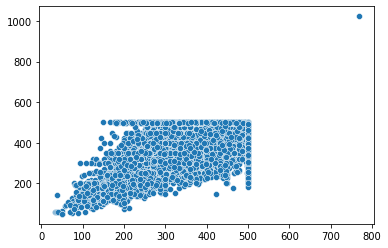

In [31]:
sns.scatterplot(x,y) # outlier bir resim gözüküyor. ancak bu sorun olmaz. resize yapınca o da düzelir. DL image recognitionda oulier daha çok blurlı, karanlık resimler için olan bir durum.

In [160]:
# decide on a shape to use it in your model as input shape. you can either use average shape size or try something different. 128*128 is preferred here
image_shape = (128,128,3)

In [36]:
np.mean(x)

356.46712

In [37]:
np.mean(y)

410.52264

In [38]:
cat_path = train_path+'cat/'+os.listdir(train_path+'cat')[0]
cat_path

'/content/data/train/cat/cat.1104.jpg'

In [39]:
cat0_img.max()

255

In [40]:
cat0_img.min()

0

In [ ]:
#help(ImageDataGenerator)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [ ]:
#use ImageDataGenerator to manipulate the images

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [161]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

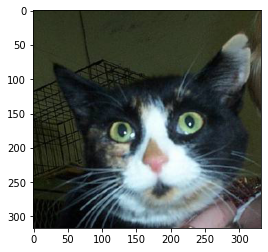

In [73]:
plt.imshow(cat0_img)

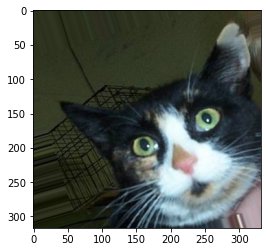

In [74]:
plt.imshow(image_gen.random_transform(cat0_img))

In [47]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [48]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


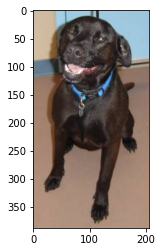

In [49]:
plt.imshow(dog1_img)

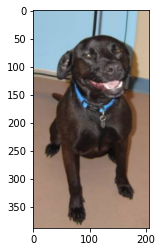

In [50]:
#show transfromed version of dog image
plt.imshow(image_gen.random_transform(dog1_img))

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg

[bağlantı metni](https://drive.google.com/file/d/1ntiw1WnsWq5en96zRQmWADFxoCKS4DNc/view?usp=sharing)

image_gen.flow_from_directory(train_path)

In [51]:
image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


# Creating the Model

In [ ]:
#create your CNN model here

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [235]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [236]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 dropout_18 (Dropout)        (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_86 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                

## Early Stopping

In [237]:
from tensorflow.keras.callbacks import EarlyStopping

In [238]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [239]:
batch_size = 128

In [241]:
#use image_gen from above and read iamges from train and test set
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [242]:
#train_image_gen =image_gen.flow_from_directory(train_path)
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(128,128),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 17526 images belonging to 2 classes.


In [243]:
#val_image_gen = image_gen.flow_from_directory(val_path)
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=(128,128),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 2290 images belonging to 2 classes.


In [244]:
#show class indices in train set
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [245]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

## Model Training

In [246]:
import warnings
warnings.filterwarnings('ignore')

In [247]:
STEP_SIZE_TRAIN=train_image_gen.n//train_image_gen.batch_size
STEP_SIZE_VAL=val_image_gen.n//val_image_gen.batch_size

In [248]:
STEP_SIZE_TRAIN, STEP_SIZE_VAL

(136, 17)

In [249]:
from gc import callbacks
results = model.fit(train_image_gen,epochs=20,
                    validation_data=val_image_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_steps=STEP_SIZE_VAL,
                    callbacks=[early_stop])

Epoch 1/20
136/136 [==============================] - 161s 1s/step - loss: 0.6134 - accuracy: 0.7122 - val_loss: 0.7247 - val_accuracy: 0.5308
Epoch 2/20
136/136 [==============================] - 157s 1s/step - loss: 0.5820 - accuracy: 0.7139 - val_loss: 0.7280 - val_accuracy: 0.5501
Epoch 3/20
136/136 [==============================] - 158s 1s/step - loss: 0.5650 - accuracy: 0.7265 - val_loss: 0.7070 - val_accuracy: 0.5708
Epoch 4/20
136/136 [==============================] - 158s 1s/step - loss: 0.5290 - accuracy: 0.7498 - val_loss: 0.6677 - val_accuracy: 0.6512
Epoch 5/20
136/136 [==============================] - 159s 1s/step - loss: 0.5054 - accuracy: 0.7666 - val_loss: 0.6239 - val_accuracy: 0.6751
Epoch 6/20
136/136 [==============================] - 159s 1s/step - loss: 0.4755 - accuracy: 0.7802 - val_loss: 0.6821 - val_accuracy: 0.6342
Epoch 7/20
136/136 [==============================] - 158s 1s/step - loss: 0.4379 - accuracy: 0.8053 - val_loss: 0.5993 - val_accuracy: 0.6838

In [250]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.613381,0.712151,0.724747,0.530790
1,0.582007,0.713875,0.727996,0.550092
2,0.564965,0.726520,0.706992,0.570772
3,0.529030,0.749799,0.667732,0.651195
4,0.505437,0.766640,0.623872,0.675092
5,0.475470,0.780205,0.682056,0.634191
6,0.437926,0.805265,0.599272,0.683824
7,0.415677,0.816818,0.548039,0.729320
8,0.388497,0.830038,0.745723,0.688419
9,0.377210,0.835211,0.456789,0.788143


# Evaluating the Model

In [251]:
losses = pd.DataFrame(summary.loss, summary.val_loss)

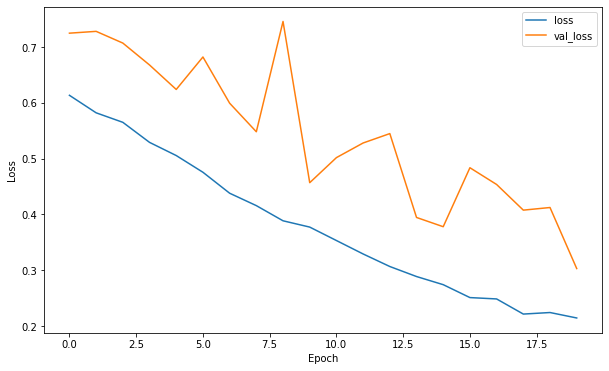

In [252]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

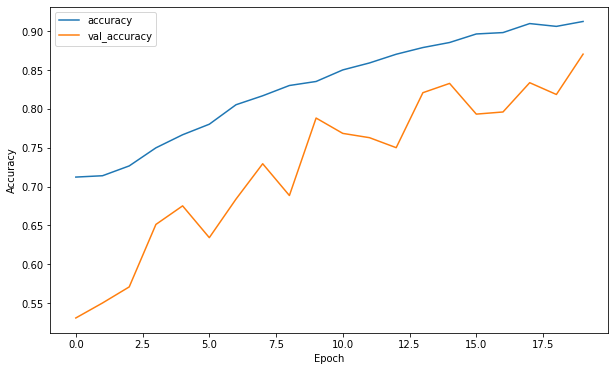

In [253]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [254]:
model.metrics_names

['loss', 'accuracy']

In [255]:
model.evaluate(val_image_gen,
steps=STEP_SIZE_VAL)

17/17 [==============================] - 15s 860ms/step - loss: 0.3084 - accuracy: 0.8699


[0.3084452152252197, 0.8699448704719543]

In [256]:
from tensorflow.keras.preprocessing import image

In [257]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=(128,128),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 2290 images belonging to 2 classes.


In [258]:
pred_probabilities = model.predict_generator(val_image_gen)

In [259]:
pred_probabilities

array([[0.9999994 ],
       [0.9947417 ],
       [0.10910184],
       ...,
       [0.01232121],
       [0.9937894 ],
       [0.62728894]], dtype=float32)

In [260]:
predictions = pred_probabilities > 0.5
predictions

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [261]:
from sklearn.metrics import classification_report,confusion_matrix

In [262]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56      1219
           1       0.46      0.38      0.41      1071

    accuracy                           0.50      2290
   macro avg       0.49      0.49      0.49      2290
weighted avg       0.49      0.50      0.49      2290



In [263]:
confusion_matrix(val_image_gen.classes,predictions)

array([[739, 480],
       [669, 402]])

In [264]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [265]:
from PIL import Image

In [266]:
#read 2749.jpg from test set
cat_new="/content/data/test/2749.jpg"

In [214]:
#cat_new = test_path+os.listdir(test_path)[250]
#cat_new

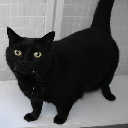

In [267]:
# resize it as 128 * 128
cat_new= image.load_img(cat_new,target_size=image_shape)
cat_new

In [268]:
type(cat_new)

PIL.Image.Image

In [269]:
# turn the image into numpy array
cat_new = image.img_to_array(cat_new)
cat_new

array([[[192., 192., 194.],
        [190., 190., 192.],
        [190., 190., 192.],
        ...,
        [128., 128., 128.],
        [129., 129., 129.],
        [122., 122., 122.]],

       [[193., 193., 195.],
        [192., 192., 194.],
        [191., 191., 193.],
        ...,
        [132., 132., 132.],
        [127., 127., 127.],
        [123., 123., 123.]],

       [[195., 195., 197.],
        [194., 194., 196.],
        [192., 192., 194.],
        ...,
        [134., 134., 134.],
        [128., 128., 128.],
        [126., 126., 126.]],

       ...,

       [[204., 213., 230.],
        [204., 213., 230.],
        [204., 213., 230.],
        ...,
        [ 62.,  64.,  63.],
        [ 62.,  64.,  63.],
        [ 60.,  62.,  61.]],

       [[204., 213., 230.],
        [204., 213., 230.],
        [204., 213., 230.],
        ...,
        [ 60.,  64.,  63.],
        [ 59.,  63.,  62.],
        [ 57.,  61.,  60.]],

       [[204., 213., 230.],
        [204., 213., 230.],
        [204., 2

In [270]:
cat_new.shape

(128, 128, 3)

In [271]:
#reshape it as below
cat_new = np.expand_dims(cat_new, axis=0)
cat_new.shape

(1, 128, 128, 3)

In [272]:
#predict the image class with your model
model.predict(cat_new)

array([[1.1927012e-21]], dtype=float32)

In [273]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [233]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [311]:
test1 = test_path+os.listdir(test_path)[2022]
test1

'/content/data/test/10027.jpg'

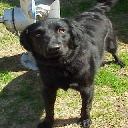

In [312]:
test1= image.load_img(test1,target_size=image_shape)
test1

In [313]:
test1 = np.expand_dims(test1, axis=0)
test1.shape

(1, 128, 128, 3)

In [314]:
model.predict(test1)[0][0]

1.0